# Exercise 6 - Electric Stimulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal

from matplotlib import rcParams
% matplotlib inline

In [2]:
rcParams.update({'font.size': 24})

## Exercise 1 - Potential Field

### Parameters

In [3]:
rho_med = 300 * 1e-2
i_1 = 1 * 10e-3
h = 10 * 10e-6
center = 25 * 10e-6

In [4]:
def potential(r, I):  return (rho_med * I)/ (4 * np.pi * r)

In [5]:
X = np.arange(0, 50*10e-6, 10e-6)
Y = np.arange(0, 50*10e-6, 10e-6)
X

array([0.0e+00, 1.0e-05, 2.0e-05, 3.0e-05, 4.0e-05, 5.0e-05, 6.0e-05,
       7.0e-05, 8.0e-05, 9.0e-05, 1.0e-04, 1.1e-04, 1.2e-04, 1.3e-04,
       1.4e-04, 1.5e-04, 1.6e-04, 1.7e-04, 1.8e-04, 1.9e-04, 2.0e-04,
       2.1e-04, 2.2e-04, 2.3e-04, 2.4e-04, 2.5e-04, 2.6e-04, 2.7e-04,
       2.8e-04, 2.9e-04, 3.0e-04, 3.1e-04, 3.2e-04, 3.3e-04, 3.4e-04,
       3.5e-04, 3.6e-04, 3.7e-04, 3.8e-04, 3.9e-04, 4.0e-04, 4.1e-04,
       4.2e-04, 4.3e-04, 4.4e-04, 4.5e-04, 4.6e-04, 4.7e-04, 4.8e-04,
       4.9e-04])

In [6]:
field = np.zeros((len(X), len(Y)))
field

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
for n, x in enumerate(X):
    for m, y in enumerate(Y):
        x_distance = center - x
        y_distance = center - y
        distance = np.sqrt(y_distance**2 + x_distance**2 + h**2)
        field[n,m] = potential(distance, i_1)
field

array([[6.49747334, 6.6187007 , 6.74159444, ..., 6.86591212, 6.74159444,
        6.6187007 ],
       [6.6187007 , 6.74697695, 6.87729838, ..., 7.00942505, 6.87729838,
        6.74697695],
       [6.74159444, 6.87729838, 7.01547548, ..., 7.15589251, 7.01547548,
        6.87729838],
       ...,
       [6.86591212, 7.00942505, 7.15589251, ..., 7.30509325, 7.15589251,
        7.00942505],
       [6.74159444, 6.87729838, 7.01547548, ..., 7.15589251, 7.01547548,
        6.87729838],
       [6.6187007 , 6.74697695, 6.87729838, ..., 7.00942505, 6.87729838,
        6.74697695]])

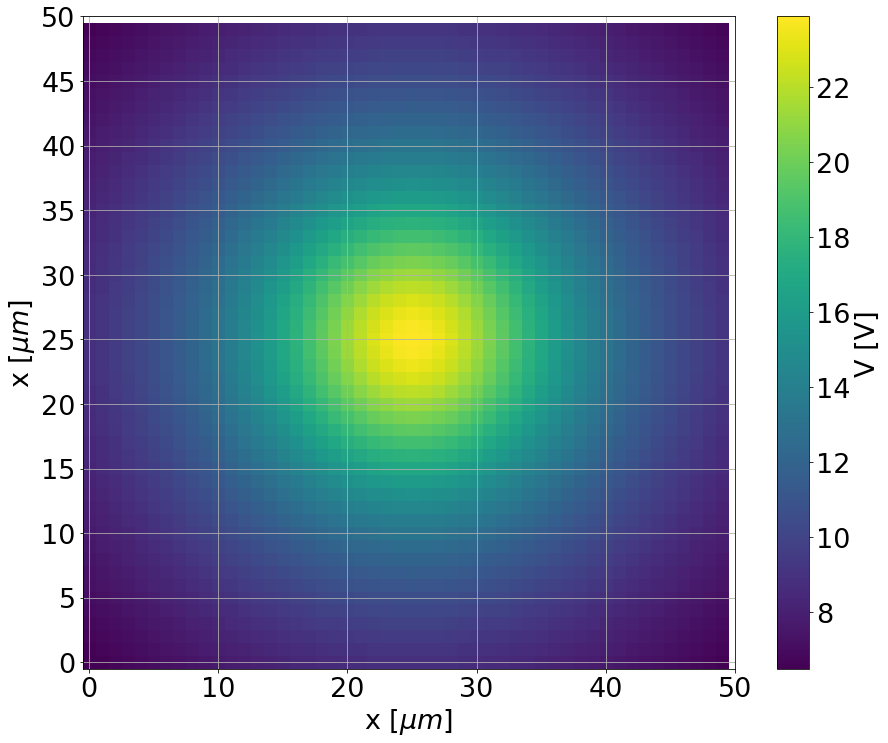

In [48]:
rcParams.update({'font.size': 27})
plt.figure(figsize=(15,12))
plt.imshow(field,
          origin='lower');

plt.grid();
cbar = plt.colorbar();
plt.yticks(np.arange(0,51,5));
plt.xticks(np.arange(0,51,10));

cbar.set_label('V [V]')
plt.xlabel('x [$\mu m$]')
plt.ylabel('x [$\mu m$]')
plt.savefig('report/1.png', dpi=200, bbox_inches='tight', transparent="True", pad_inches=0)

## Activation Function - Axon Excitation
calcualte and plot:
the exernal potential, the electric filed, the activation function along a 50 um peas of acxo positioned 10um from a current point source.

Plot the 3 graphs for electrode current of 1mA and -1mA

In [9]:
h = 10 * 10e-6
i_1 = 1 * 10e-3
i_2 =-1 * 10e-3

In [10]:
V_e1 = np.zeros(len(X))
V_e2 = np.zeros(len(X))

In [11]:
for n, x in enumerate(X):
    x_distance = center - x
    distance = np.sqrt(x_distance**2 + h**2)
    V_e1[n] = potential(distance, i_1)
V_e1;

In [12]:
for n, x in enumerate(X):
    x_distance = center - x
    distance = np.sqrt(x_distance**2 + h**2)
    V_e2[n] = potential(distance, i_2)
V_e2;

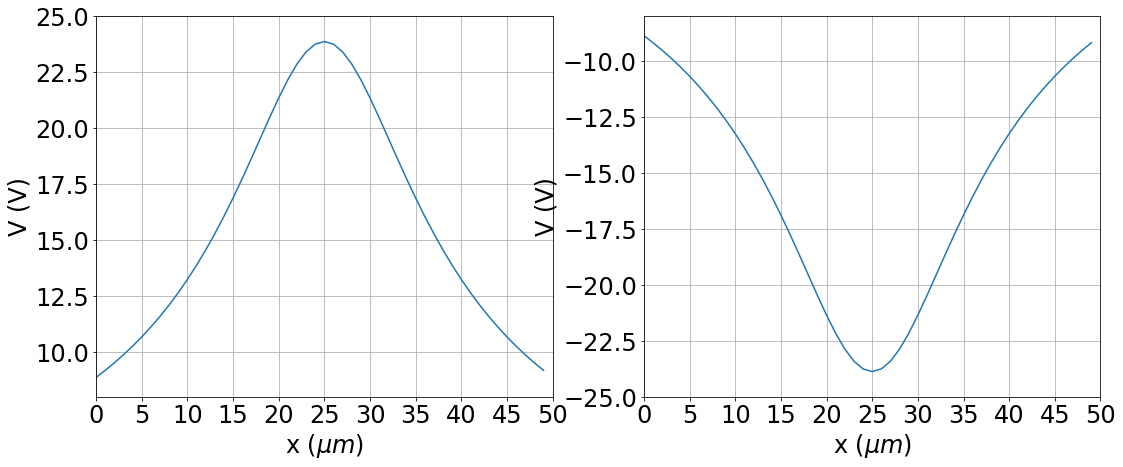

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,7));
ax[0].plot(X*1e5, V_e1)
ax[0].set_xlabel('x ($\mu m$)')
ax[0].set_ylabel('V (V)')
ax[0].grid()
ax[0].set_xlim(0, 50)
ax[0].set_ylim(8, 25)
ax[0].set_xticks(np.arange(0, 51, 5));

ax[1].plot(X*1e5, V_e2)
ax[1].set_xlabel('x ($\mu m$)')
ax[1].set_ylabel('V (V)')
ax[1].grid()
ax[1].set_xlim(0, 50)
ax[1].set_ylim(-25, -8)
ax[1].set_xticks(np.arange(0, 51, 5));

# ax[0].set_yticks(np.arange(8, 26, 1));
# ax[1].set_yticks(np.arange(-8, -26, 1));

plt.savefig('report/2_1.png', dpi=200, bbox_inches='tight', transparent="True", pad_inches=0)

In [14]:
E_field1 = -np.gradient(V_e1)
E_field2 = -np.gradient(V_e2)

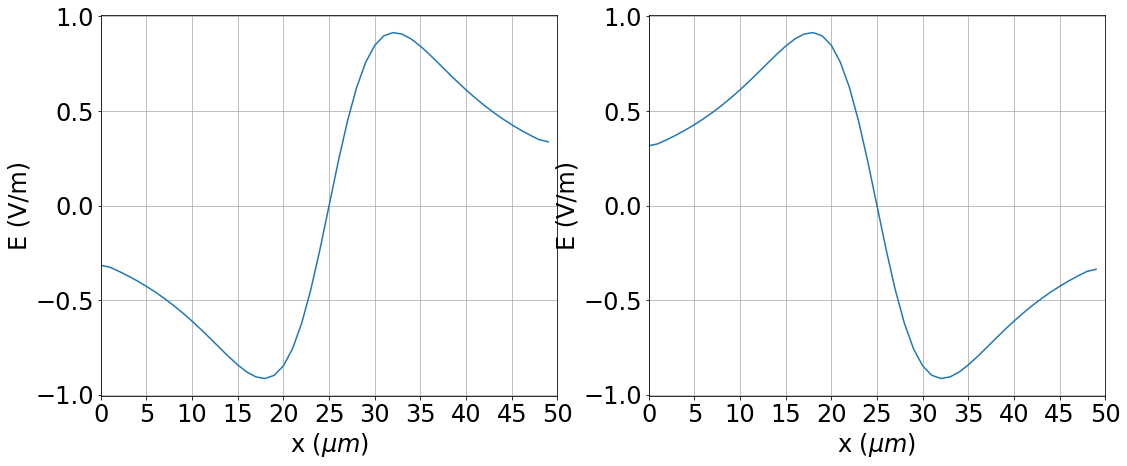

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,7));
ax[0].plot(X*1e5, E_field1)
ax[0].set_xlabel('x ($\mu m$)')
ax[0].set_ylabel('E (V/m)')
ax[0].grid()
ax[0].set_xlim(0, 50)
# ax[0].set_ylim(-25, -8)
ax[0].set_xticks(np.arange(0, 51, 5));


ax[1].plot(X*1e5, E_field2)
ax[1].set_xlabel('x ($\mu m$)')
ax[1].set_ylabel('E (V/m)')
ax[1].grid()
ax[1].set_xlim(0, 50)
# ax[1].set_ylim(-25, -8)
ax[1].set_xticks(np.arange(0, 51, 5));
plt.savefig('report/2_2.png', dpi=200, bbox_inches='tight', transparent="True", pad_inches=0)

In [16]:
activ_function1 = -np.gradient(E_field1)
activ_function2 = -np.gradient(E_field2)

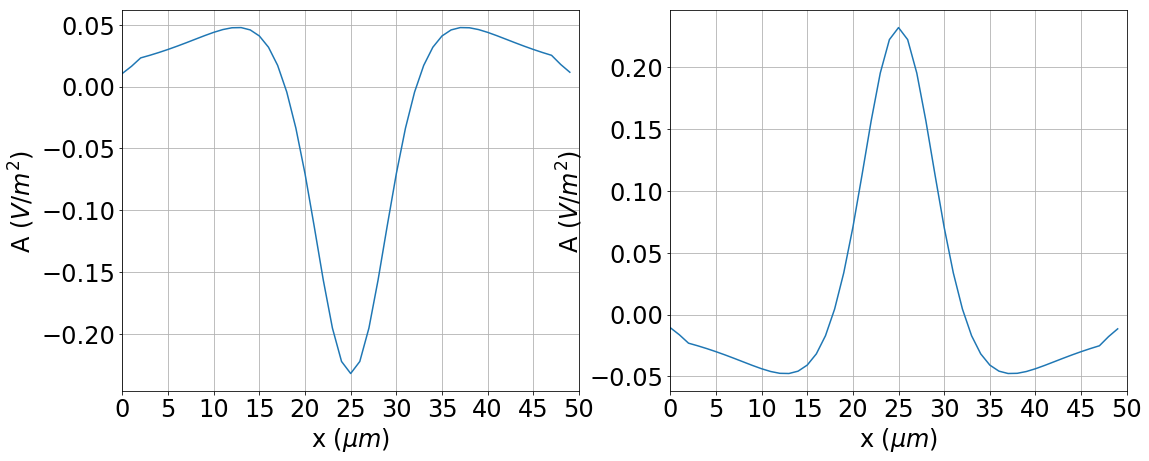

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,7));
ax[0].plot(X*1e5, activ_function1)
ax[0].set_xlabel('x ($\mu m$)')
ax[0].set_ylabel('A ($V/m^2$)')
ax[0].grid()
ax[0].set_xlim(0, 50)
# ax[0].set_ylim(-25, -8)
ax[0].set_xticks(np.arange(0, 51, 5));


ax[1].plot(X*1e5, activ_function2)
ax[1].set_xlabel('x ($\mu m$)')
ax[1].set_ylabel('A ($V/m^2$)')
ax[1].grid()
ax[1].set_xlim(0, 50)
# ax[1].set_ylim(-25, -8)
ax[1].set_xticks(np.arange(0, 51, 5));
plt.savefig('report/2_3.png', dpi=200, bbox_inches='tight', transparent="True", pad_inches=0)

## Exercise 2 - Neuron Model

### Parameters

In [18]:
C_m = 1 #membrane capacitance, in uF/cm^2

g_Na = 120.0 #maximum conducances, in mS/cm^2
g_K  = 36.0
g_L  = 0.3

V_Na = 115 #Nernst reversal potentials, in mV
V_K  = -12
V_L  = 10.6
V_rest = 0
num_comp = 100

In [19]:
dt = 25*10e-3
t = np.arange(0,100,dt)
one_ms = int(1 / dt)

### Rate equations V in mV:
non-linear paramiters alfa and beta

In [20]:
def alpha_m(u): return (2.5 - 0.1 * u) / (np.exp(2.5 - 0.1 * u) - 1)
def alpha_n(u): return (0.1 - 0.01 * u) / (np.exp(1 - 0.1 * u ) - 1)
def alpha_h(u): return (0.07 * np.exp(-u / 20))

def beta_m(u):  return 4 * np.exp((-u) / 18)
def beta_n(u):  return 0.125 * np.exp((-u) / 80)
def beta_h(u):  return 1 / (np.exp(3 - 0.1 * u) + 1)

In [21]:
def temp_corr(T): return 3**(0.1*(T-6.3))  

### Time constants
τx(u)=[αx(u)+βx(u)] ^ −1

In [22]:
def tau_m(u): return (alpha_m(u) + beta_m(u))**(-1)
def tau_n(u): return (alpha_n(u) + beta_n(u))**(-1)
def tau_h(u): return (alpha_h(u) + beta_h(u))**(-1)

In [23]:
def m_ss(u): return alpha_m(u) / (alpha_m(u) + beta_m(u))
def n_ss(u): return alpha_n(u) / (alpha_n(u) + beta_n(u))
def h_ss(u): return alpha_h(u) / (alpha_h(u) + beta_h(u))

## Hodgkin & Huxley Multicompartment Model 
implement a function that calculates the ionic current density i_ion, 
use the exponential-euler solver



In [24]:
def dm_du(m, u): return alpha_m(u) * (1 - m) - beta_m(u) * m
def dn_du(n, u): return alpha_n(u) * (1 - n) - beta_n(u) * n
def dh_du(h, u): return alpha_h(u) * (1 - h) - beta_h(u) * h

## Model

In [25]:
def hh_current(M, N, H, u):
    INa = g_Na * (M**3 * H) * (u - V_Na)  #sodium channel
    IK  = g_K  * (N**4    ) * (u - V_K)   #potas
    IL  = g_L               * (u - V_L)

    return INa + IK + IL

### Connectivity Matrix

In [26]:
C = np.identity(100)
np.fill_diagonal(C, -2)
C[0][0] = -1
C[-1][-1] = -1

for i in range(0,100):
    for j in range(0,100):
        if i==j+1:
            C[i][j] = 1
        if i==j-1:
            C[i][j] = 1

C

array([[-1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -1.]])

In [27]:
def hh_model_exp_multi(num, temperature, T, dt, Ve):
    l = len(T)
    M = np.zeros((num,l))
    N = np.zeros((num,l))
    H = np.zeros((num,l))

    I = np.identity(num)
    U = np.zeros((num,l))

    M[:,0] = np.ones(num) * m_ss(0)
    N[:,0] = np.ones(num) * n_ss(0)
    H[:,0] = np.ones(num) * h_ss(0)
    k = temp_corr(temperature)

    for t in np.arange(0, l - 1):
        
        u = U[:,t]
        I_ion = hh_current(M[:,t], N[:,t], H[:,t], u)
        
        temp = np.dot(Ve[:,t+1], C)
        temp[0] = temp[1]
        temp[num-1] = temp[num-2]

        b = U[:, t] + (dt/C_m) * (-I_ion + temp/Ra)
        A = (I - (dt/(C_m * Ra)) * C)
                
        U[:, t+1] = np.linalg.solve(A,b)  
        
        A_m = -1 * k * (alpha_m(u) + beta_m(u))
        A_n = -1 * k * (alpha_n(u) + beta_n(u))
        A_h = -1 * k * (alpha_h(u) + beta_h(u))
        B_m = k * alpha_m(u)
        B_n = k * alpha_n(u)
        B_h = k * alpha_h(u)

        M[:,t+1] = M[:,t] * np.exp(A_m * dt) + B_m/A_m * (np.exp(A_m * dt)-1)
        N[:,t+1] = N[:,t] * np.exp(A_n * dt) + B_n/A_n * (np.exp(A_n * dt)-1)
        H[:,t+1] = H[:,t] * np.exp(A_h * dt) + B_h/A_h * (np.exp(A_h * dt)-1)

    
    return U

### Experiment 1

In [28]:
# Axon
h = 10 * 10**-6

rho_axon = 0.01 #* 1e2 #* 10**-2
rho_medium = 300 #* 1e-2

r_axon = 1.5 * 10**-4  #* 10**-2
l_comp = 0.5 * 10**-4 #* 10**-2
Ra = rho_axon * l_comp / (np.pi * r_axon**2)
Ra

7.07355302630646

In [29]:
def potential(r, I):  return (rho_medium * I)/ (4 * np.pi * r)

In [30]:
dt = 10e-3
num_comp = 100

one_ms = int(1 / dt)
T = np.arange(0,30,dt)

I_ext = np.zeros(len(T))
I_ext[5*one_ms:6*one_ms] = -2.5*10**-3
radius = np.zeros(num_comp)

In [31]:
V_external = np.zeros((num_comp,len(T)))
x_stim = 50
for t_step in np.arange(0, len(T)):
    for comp in np.arange(0, num_comp):
        x_dist = np.abs(x_stim - comp) * (l_comp / 100)
        radius[comp] = np.sqrt(h**2 + x_dist**2)
        V_external[comp, t_step] = (I_ext[t_step] * rho_medium) / (4 * np.pi * radius[comp])


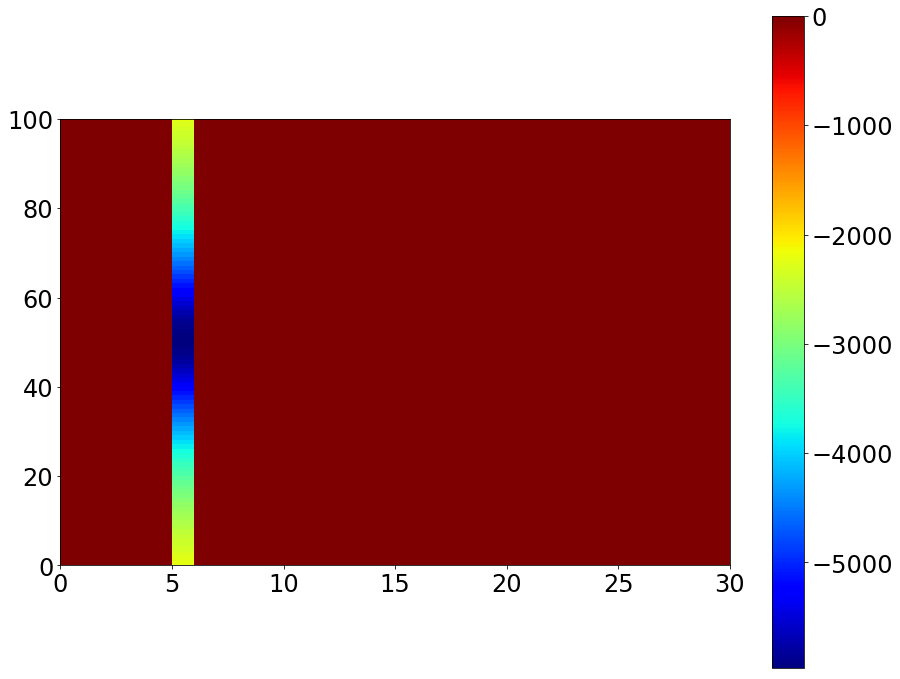

In [32]:
plt.figure(figsize=(15,12))
plt.imshow(V_external,
           aspect=.2,
          
           origin='lower',
           cmap = 'jet',
           extent=[0, 30, 0, 100],
          )

cbar = plt.colorbar()

In [33]:
V1 = hh_model_exp_multi(num_comp, 6.3, T, dt, V_external)
V1;

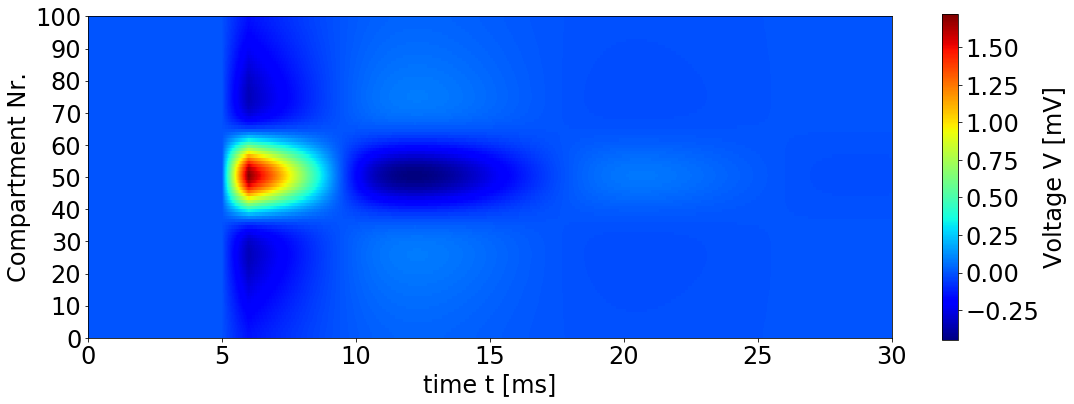

In [34]:
plt.figure(figsize=(18,6))
plt.imshow(V1,
           aspect=.12,
           cmap = 'jet',
           extent=[0, 30, 0, 100],
           origin='lower',       
   
         )
cbar = plt.colorbar()
plt.yticks(np.arange(0,101,10))
plt.xticks(np.arange(0,31,5))
cbar.set_label('Voltage V [mV]')
plt.xlabel('time t [ms]')
plt.ylabel('Compartment Nr.')
plt.savefig('report/3_1.png', dpi=200, bbox_inches='tight', transparent="True", pad_inches=0)

### Second Experiment

In [35]:
I_ext = np.zeros(len(T))
I_ext[5*one_ms:6*one_ms] = -10*10**-3
radius = np.zeros(num_comp)

In [36]:
V_external = np.zeros((num_comp,len(T)))
x_stim = 50
for t_step in np.arange(0, len(T)):
    for comp in np.arange(0, num_comp):
        x_dist = np.abs(x_stim - comp) * (l_comp / 100)
        radius[comp] = np.sqrt(h**2 + x_dist**2)
        V_external[comp, t_step] = (I_ext[t_step] * rho_medium) / (4 * np.pi * radius[comp])


In [37]:
V2 = hh_model_exp_multi(num_comp, 6.3, T, dt, V_external)
V2;


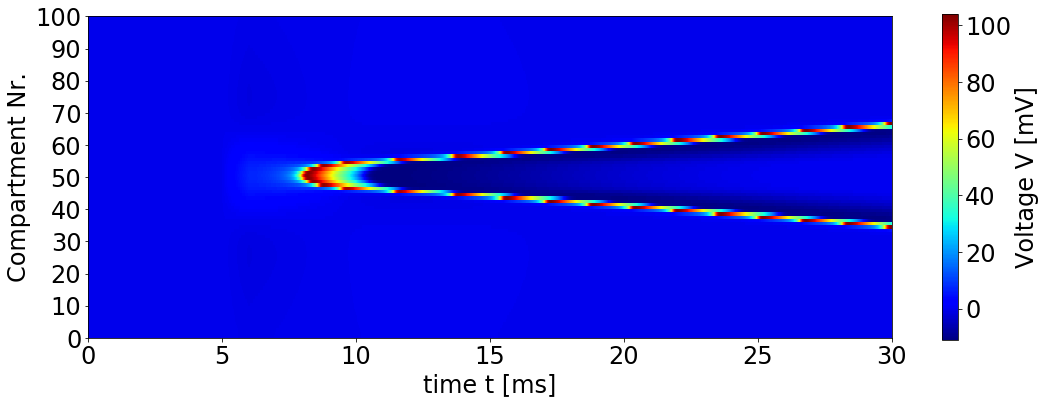

In [38]:
plt.figure(figsize=(18,6))
plt.imshow(V2,
           aspect=.12,
           cmap = 'jet',
           extent=[0, 30, 0, 100],
           origin='lower',       
   
         )
cbar = plt.colorbar()
plt.yticks(np.arange(0,101,10))
plt.xticks(np.arange(0,31,5))
cbar.set_label('Voltage V [mV]')
plt.xlabel('time t [ms]')
plt.ylabel('Compartment Nr.')
plt.savefig('report/3_2.png', dpi=200, bbox_inches='tight', transparent="True", pad_inches=0)

### Third Experiment

In [39]:
I_ext = np.zeros(len(T))
I_ext[5*one_ms:6*one_ms] = -5*10**-3
I_ext[6*one_ms:7*one_ms] = 5*10**-3

radius = np.zeros(num_comp)

V_external = np.zeros((num_comp,len(T)))
x_stim = 50
for t_step in np.arange(0, len(T)):
    for comp in np.arange(0, num_comp):
        x_dist = np.abs(x_stim - comp) * (l_comp / 100)
        radius[comp] = np.sqrt(h**2 + x_dist**2)
        V_external[comp, t_step] = (I_ext[t_step] * rho_medium) / (4 * np.pi * radius[comp])

        
V3 = hh_model_exp_multi(num_comp, 6.3, T, dt, V_external)
V3;

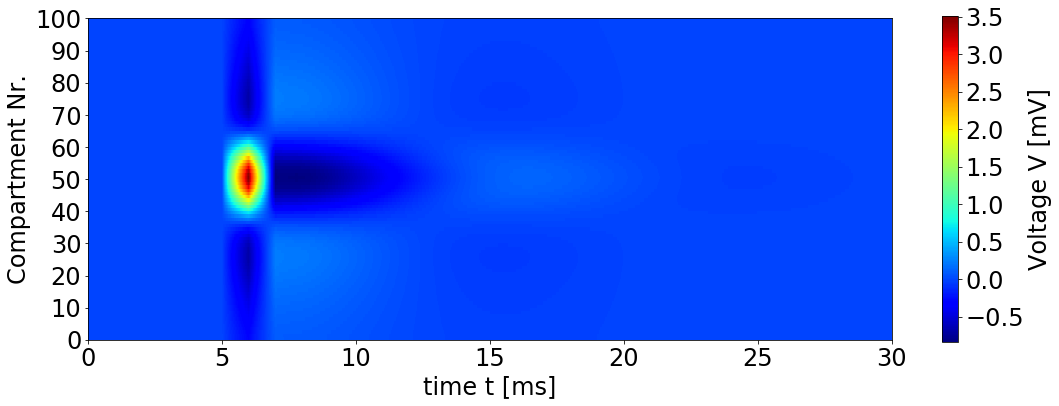

In [40]:
plt.figure(figsize=(18,6))
plt.imshow(V3,
           aspect=.12,
           cmap = 'jet',
           extent=[0, 30, 0, 100],
           origin='lower',       
   
         )
cbar = plt.colorbar()
plt.yticks(np.arange(0,101,10))
plt.xticks(np.arange(0,31,5))
cbar.set_label('Voltage V [mV]')
plt.xlabel('time t [ms]')
plt.ylabel('Compartment Nr.')
plt.savefig('report/3_3.png', dpi=200, bbox_inches='tight', transparent="True", pad_inches=0)

### Fourth EXperiment

In [41]:
I_ext = np.zeros(len(T))
I_ext[5*one_ms:6*one_ms] = -20*10**-3
I_ext[6*one_ms:7*one_ms] = 20*10**-3

radius = np.zeros(num_comp)

V_external = np.zeros((num_comp,len(T)))
x_stim = 50
for t_step in np.arange(0, len(T)):
    for comp in np.arange(0, num_comp):
        x_dist = np.abs(x_stim - comp) * (l_comp / 100)
        radius[comp] = np.sqrt(h**2 + x_dist**2)
        V_external[comp, t_step] = (I_ext[t_step] * rho_medium) / (4 * np.pi * radius[comp])

        
V3 = hh_model_exp_multi(num_comp, 6.3, T, dt, V_external)
V3;

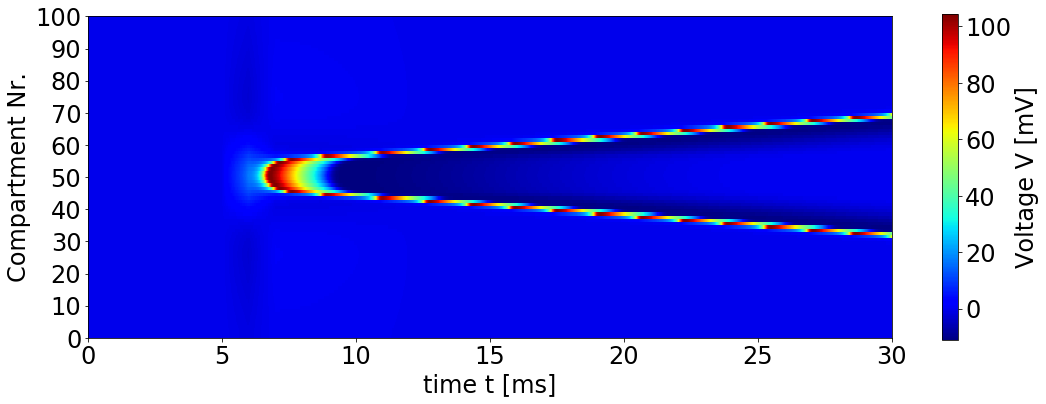

In [42]:
plt.figure(figsize=(18,6))
plt.imshow(V3,
           aspect=.12,
           cmap = 'jet',
           extent=[0, 30, 0, 100],
           origin='lower',       
   
         )
cbar = plt.colorbar()
plt.yticks(np.arange(0,101,10))
plt.xticks(np.arange(0,31,5))
cbar.set_label('Voltage V [mV]')
plt.xlabel('time t [ms]')
plt.ylabel('Compartment Nr.')
plt.savefig('report/3_4.png', dpi=200, bbox_inches='tight', transparent="True", pad_inches=0)

### Fifth Experiment

In [43]:
I_ext = np.zeros(len(T))
I_ext[5*one_ms:6*one_ms] = 2.5*10**-3

radius = np.zeros(num_comp)

V_external = np.zeros((num_comp,len(T)))
x_stim = 50
for t_step in np.arange(0, len(T)):
    for comp in np.arange(0, num_comp):
        x_dist = np.abs(x_stim - comp) * (l_comp / 100)
        radius[comp] = np.sqrt(h**2 + x_dist**2)
        V_external[comp, t_step] = (I_ext[t_step] * rho_medium) / (4 * np.pi * radius[comp])

        
V3 = hh_model_exp_multi(num_comp, 6.3, T, dt, V_external)
V3;

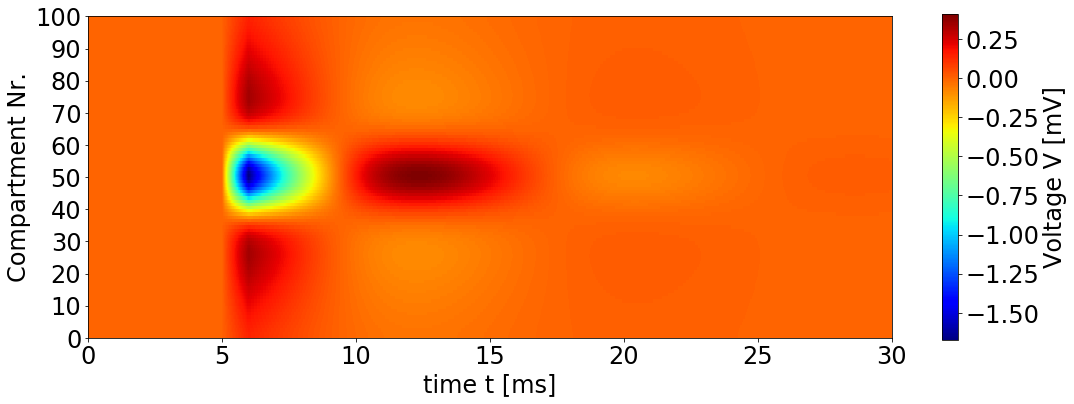

In [44]:
plt.figure(figsize=(18,6))
plt.imshow(V3,
           aspect=.12,
           cmap = 'jet',
           extent=[0, 30, 0, 100],
           origin='lower',       
   
         )
cbar = plt.colorbar()
plt.yticks(np.arange(0,101,10))
plt.xticks(np.arange(0,31,5))
cbar.set_label('Voltage V [mV]')
plt.xlabel('time t [ms]')
plt.ylabel('Compartment Nr.')
plt.savefig('report/3_5.png', dpi=200, bbox_inches='tight', transparent="True", pad_inches=0)

### Sixth Experiment

In [45]:
I_ext = np.zeros(len(T))
I_ext[5*one_ms:6*one_ms] = 50*10**-3

radius = np.zeros(num_comp)

V_external = np.zeros((num_comp,len(T)))
x_stim = 50
for t_step in np.arange(0, len(T)):
    for comp in np.arange(0, num_comp):
        x_dist = np.abs(x_stim - comp) * (l_comp / 100)
        radius[comp] = np.sqrt(h**2 + x_dist**2)
        V_external[comp, t_step] = (I_ext[t_step] * rho_medium) / (4 * np.pi * radius[comp])

        
V3 = hh_model_exp_multi(num_comp, 6.3, T, dt, V_external)
V3;

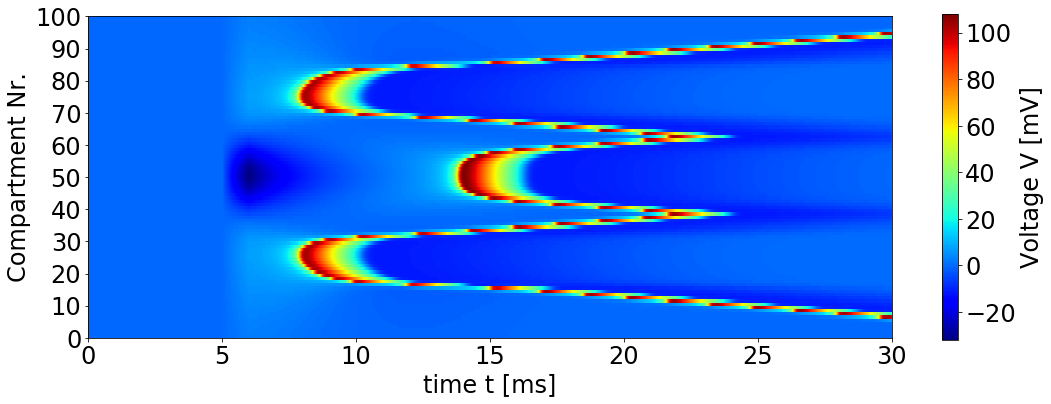

In [46]:
plt.figure(figsize=(18,6))
plt.imshow(V3,
           aspect=.12,
           cmap = 'jet',
           extent=[0, 30, 0, 100],
           origin='lower',       
   
         )
cbar = plt.colorbar()
plt.yticks(np.arange(0,101,10))
plt.xticks(np.arange(0,31,5))
cbar.set_label('Voltage V [mV]')
plt.xlabel('time t [ms]')
plt.ylabel('Compartment Nr.')
plt.savefig('report/3_6.png', dpi=200, bbox_inches='tight', transparent="True", pad_inches=0)